In [68]:
import cv2
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
import os
import scipy
import yaml
import random

In [2]:
count_figures = 0
all_positions_dict = {}
all_figures_dict = {}

In [3]:
def overlay(background, mask, mask_opacity=0.2, img_opacity=0.7):
    result = cv2.addWeighted(background, img_opacity, mask, mask_opacity, 0)
    plt.imshow(result, cmap='gray')
    plt.title('Check the mask')
    plt.show()

In [4]:
/home/sasha/WSLProjects/sem_simulator/data/in/bin_masks

SyntaxError: invalid syntax (4067801169.py, line 1)

In [69]:
path_to_dir= "../sem_simulator/data/in/"

den_dir = os.path.join(path_to_dir, 'denoised')

bin_dir = os.path.join(path_to_dir, 'iter2part12_part13_E200_G73_mask_scunet')
orig_dir = os.path.join(path_to_dir, 'raw')
# other = os.path.join(path_to_dir, 'mask_scunet_correct')
filenames_masks = os.listdir(bin_dir)
# filenames.sort()
print(f'Total: {len(filenames_masks)} files')
save_dir = os.path.join(path_to_dir, 'iter2part12_part13_E200_G73_sem_masks')
os.makedirs(save_dir, exist_ok=True)

Total: 51 files


In [9]:
save_dir

'../sem_simulator/data/in/iter2part12_part13_E200_G73_sem_masks'

In [10]:
def detect_contour(img):
    cont, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    cont_image = np.zeros_like(img)
    cv2.drawContours(cont_image, cont, -1, 255, 0)
    plt.imshow(cont_image) 
    
    return cont, cont_image

In [11]:
def scale_contour(cnt, scale):
    M = cv2.moments(cnt)
    print(M['m10'], M['m00'])
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])

        cnt_norm = cnt - [cx, cy]
        cnt_scaled = cnt_norm * scale
        cnt_scaled = cnt_scaled + [cx, cy]
        cnt_scaled = cnt_scaled.astype(np.int32)

        return cnt_scaled
    return cnt

In [41]:
def contour_offset(src, offset):
    return [point + offset for point in src]

def scale_contour(src, scale):
    rct = cv2.boundingRect(np.array(src))

    rct_offset = (-rct[0], -rct[1])
    dc_contour = contour_offset(src, rct_offset)

    dc_contour_scale = [point * scale for point in dc_contour]
    # dc_contour_scale = [point * scale for point in src]

    # dc_contour_scale = [point * scale_param for point in dc_contour]

    # test = np.zeros((1024, 768))

    # print(type(dc_contour_scale))
    rct_scale = cv2.boundingRect(np.array(dc_contour_scale, dtype=np.int32))

    # rct_scale = cv2.boundingRect(np.array(dc_contour_scale))

    offset = ((rct[2] - rct_scale[2]) // 2, (rct[3] - rct_scale[3]) // 2)
    offset = tuple(np.array(offset) - np.array(rct_offset))
    
    dst = [tuple(np.array(point) + np.array(offset)) for point in dc_contour_scale]
    return dst

def scale_contours(src, scale):
    dst = []
    for contour in src:
        scale_factor = random.uniform(1.08, 2)
        scaled_contour = scale_contour(contour, scale_factor)
        if 

        else:
            dst.append(scaled_contour)
    return dst


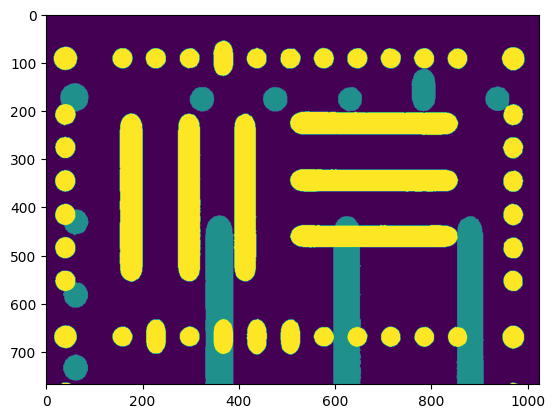

In [42]:
for file_name in filenames_masks:
    bin_mask = cv2.imread(os.path.join(bin_dir, file_name), 0)
    # plt.imshow(bin_mask)
    cont, cont_image = detect_contour(bin_mask)
    dst = scale_contours(cont, 1.2)

    dst_np = [np.array(contour, dtype=np.int32) for contour in dst]

    
    cv2.drawContours(cont_image, dst_np, -1, 128, -1)
    cv2.drawContours(cont_image, cont, -1, 255, -1)

    plt.imshow(cont_image)

    
    # test = np.zeros_like(bin_mask)
    

In [51]:
cv2.fillConvexPoly(test, cont // 2, 255)  # draws contour resized 1x/2

resized_contour = np.array(cont) * 2
cv2.polylines(test, [resized_contour], isClosed=True, color=255)  # draws contour resized 2x

plt.imshow(test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

TypeError: unsupported operand type(s) for //: 'tuple' and 'int'

In [ ]:
def ccw(A,B,C):
    return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])

def contour_intersect(cnt_ref,cnt_query):

    ## Contour is a list of points
    ## Connect each point to the following point to get a line
    ## If any of the lines intersect, then break

    for ref_idx in range(len(cnt_ref)-1):
    ## Create reference line_ref with point AB
        A = cnt_ref[ref_idx][0]
        B = cnt_ref[ref_idx+1][0] 
    
        for query_idx in range(len(cnt_query)-1):
            ## Create query line_query with point CD
            C = cnt_query[query_idx][0]
            D = cnt_query[query_idx+1][0]
        
            ## Check if line intersect
            if ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D):
                ## If true, break loop earlier
                return True

    return False

In [ ]:
def if_intersect(img):

    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Проверка пересечения ограничивающих прямоугольников контуров
    for i, contour1 in enumerate(contours):
        for j, contour2 in enumerate(contours):
            if i != j:  # Избегаем проверки контура на пересечение с самим собой
                rect1 = cv2.boundingRect(contour1)
                rect2 = cv2.boundingRect(contour2)
                intersection = not (rect1[0] + rect1[2] < rect2[0] or rect2[0] + rect2[2] < rect1[0] or
                                    rect1[1] + rect1[3] < rect2[1] or rect2[1] + rect2[3] < rect1[1])
                if intersection:
                    return True
    return False
                    # print("Контуры", i, "и", j, "пересекаются!")

In [114]:
def does_contour_overlap(contour, all_contours):
    # print(type(contour))
    x, y, w, h = cv2.boundingRect(np.array(contour, dtype=np.int32))
    contour_box = [x, y, x + w, y + h]

    for other_contour in all_contours:
        if contour is not other_contour:
            other_x, other_y, other_w, other_h = cv2.boundingRect(np.array(other_contour, dtype=np.int32))
            other_box = [other_x, other_y, other_x + other_w, other_y + other_h]

            # Check for overlap by comparing bounding boxes
            if not (contour_box[2] < other_box[0] or contour_box[0] > other_box[2] or
                    contour_box[3] < other_box[1] or contour_box[1] > other_box[3]):
                return True

    return False

In [148]:
def contour_offset(src, offset):
    dst = [point + offset for point in src]
    return dst

def scale_contour(src, scale, other_contours):

    rct = cv2.boundingRect(np.array(src))

    rct_offset = (-rct[0], -rct[1])
    dc_contour = contour_offset(src, rct_offset)

    dc_contour_scale = [point * scale for point in dc_contour]
    rct_scale = cv2.boundingRect(np.array(dc_contour_scale, dtype=np.int32))


    offset = ((rct[2] - rct_scale[2]) // 2, (rct[3] - rct_scale[3]) // 2)
    offset = tuple(np.array(offset) - np.array(rct_offset))
    
    dst = [tuple(np.array(point) + np.array(offset)) for point in dc_contour_scale]


    if does_contour_overlap(dst, other_contours):
        # scale_ = scale
        scale = 1.2
        scale_contour(src, scale, other_contours)

    return dst


def check_contour(others, scaled, bin_mask):
    scaled = [np.array(point, dtype=np.int32) for point in scaled]
    test = np.zeros_like(bin_mask)
    test1 = np.zeros_like(bin_mask)
    cv2.drawContours(test, scaled, -1, 128, -1)
    cv2.drawContours(test1, others, -1, 128, -1)
    intersect = cv2.bitwise_and(test, test1)
    # print(intersect)
    if 1 in intersect:
        return True
    return False



def scale_contours(src, bin_mask):
    dst = []
    k = 0 
    for i, contour in enumerate(src):
        other_contours = src[:i] + src[i+1:] # Другие контуры, кроме текущего
        scale_factor = random.uniform(1.1, 2)
        scaled_contour = scale_contour(contour, scale_factor, other_contours)
            

        if scaled_contour is not None:
            dst.append(scaled_contour)
    return dst


In [270]:
def contour_offset(src, offset):
    return [tuple(np.array(point) + np.array(offset)) for point in src]

def does_contour_overlap(contour, other_contours, bin_mask):
    test = np.zeros_like(bin_mask)
    test1 = np.zeros_like(bin_mask)
    cv2.drawContours(test, [np.array(contour, dtype=np.int32)], -1, 128, -1)
    cv2.drawContours(test1, other_contours, -1, 128, -1)
    intersect = cv2.bitwise_and(test, test1)
    if len(np.unique(intersect)) > 1:
        return True
    return False
    # print(len(np.unique(intersect)))
    # return 1 in np.unique(intersect)

def scale_contour(src, scale, other_contours, bin_mask):
    rct = cv2.boundingRect(np.array(src))
    rct_offset = (-rct[0], -rct[1])
    dc_contour = contour_offset(src, rct_offset)
    dc_contour_scale = [tuple(np.array(point) * scale) for point in dc_contour]
    rct_scale = cv2.boundingRect(np.array(dc_contour_scale, dtype=np.int32))
    offset = ((rct[2] - rct_scale[2]) // 2, (rct[3] - rct_scale[3]) // 2)
    offset = tuple(np.array(offset) - np.array(rct_offset))
    dst = [tuple(np.array(point) + np.array(offset)) for point in dc_contour_scale]
    # print(does_contour_overlap(dst, other_contours))
    # if does_contour_overlap(dst, other_contours, bin_mask):
    #     scale = 1.1 # Modify the scale factor as needed
    #     scale_contour(src, scale, other_contours, bin_mask)
    #     dc_contour_scale = [tuple(np.array(point) * scale) for point in dc_contour_scale]
    #     rct_scale = cv2.boundingRect(np.array(dc_contour_scale, dtype=np.int32))
    #     offset = ((rct[2] - rct_scale[2]) // 2, (rct[3] - rct_scale[3]) // 2)
    #     offset = tuple(np.array(offset) - np.array(rct_offset))
    #     dst = [tuple(np.array(point) + np.array(offset)) for point in dc_contour_scale]

    return dst

def scale_contours(src, bin_mask):
    dst = []
    for i, contour in enumerate(src):
        # print(type(src))
        other_contours = src[:i] + src[i+1:]  # Other contours except the current one

        if len(contour) > 160:
            scale_factor = random.uniform(1.1, 1.45)
        else:
            scale_factor = random.uniform(1.1, 1.6)
            
        scaled_contour = scale_contour(contour, scale_factor, other_contours, bin_mask)
        if scaled_contour is not None:
            if does_contour_overlap(scaled_contour, other_contours, bin_mask):
                print(len(scaled_contour))
                if len(scaled_contour) > 200:
                    scaled_contour = scale_contour(contour, scale_factor*0.5, other_contours, bin_mask)
                if len(scaled_contour) > 600:
                    scaled_contour = scale_contour(contour, scale_factor*0.3, other_contours, bin_mask)
                else:
                    scaled_contour = scale_contour(contour, scale_factor*0.8, other_contours, bin_mask)



            dst.append(scaled_contour)
    return dst

175
672
721
168
733
737
116
115
115
115
168
113
174
168
113
729


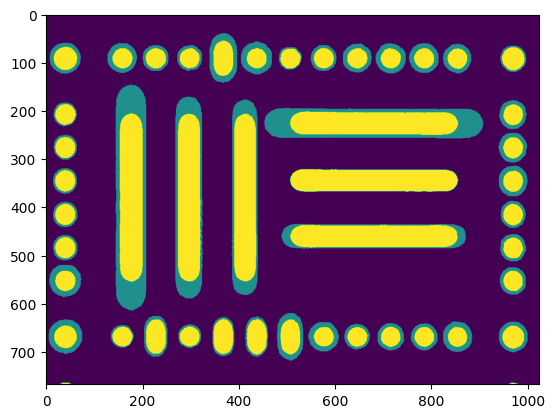

In [272]:
for file_name in filenames_masks:
    bin_mask = cv2.imread(os.path.join(bin_dir, file_name), 0)
    # plt.imshow(bin_mask)
    cont, cont_image = detect_contour(bin_mask)
    dst = scale_contours(cont, bin_mask)
    # print(dst)
    dst_np = [np.array(contour, dtype=np.int32) for contour in dst]

    cv2.drawContours(cont_image, dst_np, -1, 128, -1)
    cv2.drawContours(cont_image, cont, -1, 255, -1)

    cv2.imwrite(os.path.join(save_dir, file_name), cont_image.astype(np.uint8))

    plt.imshow(cont_image)

In [63]:
def ccw(A,B,C):
    return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])

def contour_intersect(others, cnt_query):

    ## Contour is a list of points
    ## Connect each point to the following point to get a line
    ## If any of the lines intersect, then break
    for cnt_ref in others:
        for ref_idx in range(len(cnt_ref)-1):
        ## Create reference line_ref with point AB
            A = cnt_ref[ref_idx][0]
            B = cnt_ref[ref_idx+1][0] 
        
            for query_idx in range(len(cnt_query)-1):
                ## Create query line_query with point CD
                C = cnt_query[query_idx][0]
                D = cnt_query[query_idx+1][0]
            
                ## Check if line intersect
                if ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D):
                    ## If true, break loop earlier
                    return True

    return False

In [70]:
def contour_offset(src, offset):
    dst = [point + offset for point in src]
    return dst

def scale_contour(src, scale, other_contours):
    rct = cv2.boundingRect(np.array(src))

    rct_offset = (-rct[0], -rct[1])
    dc_contour = contour_offset(src, rct_offset)

    dc_contour_scale = [tuple(np.array(point) * scale) for point in dc_contour]
    dc_contour_scale = [[(point[0])] for point in dc_contour_scale]
    # print(dc_contour_scale)

    rct_scale = cv2.boundingRect(np.array(dc_contour_scale, dtype=np.int32))

    offset = ((rct[2] - rct_scale[2]) // 2, (rct[3] - rct_scale[3]) // 2)
    offset = tuple(np.array(offset) - np.array(rct_offset))
    
    dst = [tuple(np.array(point) + np.array(offset)) for point in dc_contour_scale]

    # Проверка на пересечение с другими контурами
    for other in other_contours:
        if cv2.pointPolygonTest(np.array(other), dst[0][0], False) > 0:
            return None

    return dst

def scale_contours(src):
    dst = []
    # print(src[0])
    for i, contour in enumerate(src):
        scale_factor = random.uniform(1.08, 2)
        
        # other_contours = [c for c in src if c is not contour]
        other_contours = src[:i] + src[i+1:]
        scaled_contour = None
        attempts = 0
        max_attempts = 20
        while scaled_contour is None and attempts < max_attempts:
            scaled_contour = scale_contour(contour, scale_factor, other_contours)
            scaled_contour = [[(point[0])] for point in scaled_contour]

            # print(scaled_contour)
            # if contour_intersect(other_contours, scaled_contour):
            #     scale_factor = random.uniform(1.08, scale_factor)
            #     attempts += 1



            # if scaled_contour is None:
            #     scale_factor = random.uniform(1.08, scale_factor)
            #     attempts += 1
        
        if scaled_contour is not None:
            dst.append(scaled_contour)
    return dst

[[array([963.78962028, 750.        ])], [array([962.2036456 , 751.58597469])], [array([960.61767091, 751.58597469])], [array([959.03169623, 751.58597469])], [array([957.44572154, 751.58597469])], [array([955.85974686, 753.17194937])], [array([954.27377217, 753.17194937])], [array([952.68779748, 754.75792406])], [array([951.1018228 , 754.75792406])], [array([949.51584811, 756.34389874])], [array([947.92987343, 757.92987343])], [array([946.34389874, 759.51584811])], [array([944.75792406, 761.1018228 ])], [array([943.17194937, 762.68779748])], [array([943.17194937, 764.27377217])], [array([941.58597469, 765.85974686])], [array([940.        , 767.44572154])], [array([940.        , 769.03169623])], [array([940.        , 770.61767091])], [array([941.58597469, 770.61767091])], [array([943.17194937, 770.61767091])], [array([944.75792406, 770.61767091])], [array([946.34389874, 770.61767091])], [array([947.92987343, 770.61767091])], [array([949.51584811, 770.61767091])], [array([951.1018228 , 77

TypeError: 'NoneType' object is not iterable

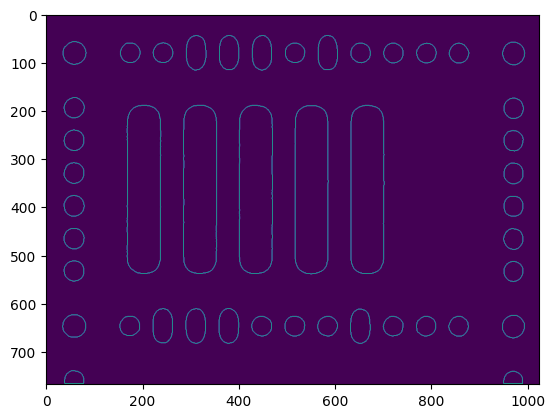

In [71]:
if __name__ == "__main__":
    # src = []  # Add your source contours

    for file_name in filenames_masks:
        bin_mask = cv2.imread(os.path.join(bin_dir, file_name), 0)
        cont, cont_image = detect_contour(bin_mask)

        # src = [] # Замените данными о контурах
        dst = scale_contours(cont)

        dst_np = [np.array(contour, dtype=np.int32) for contour in dst]

        cv2.drawContours(cont_image, dst_np, -1, 128, -1)
        cv2.drawContours(cont_image, cont, -1, 255, -1)

        plt.imshow(cont_image)
        # cv2.imwrite(os.path.join(save_dir, file_name), cont_image)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

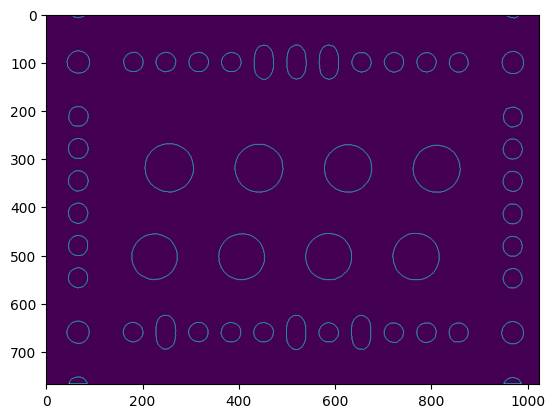

In [19]:
if __name__ == "__main__":
    # src = []  # Add your source contours

    for file_name in filenames_masks:
        bin_mask = cv2.imread(os.path.join(bin_dir, file_name), 0)
        cont, cont_image = detect_contour(bin_mask)

        # src = [] # Замените данными о контурах
        dst = scale_contours(cont)
        # test = np.zeros_like(bin_mask)
        # for c in cont:
        #     # expansion_amount = random.randint(5, 20)
        #     # expanded = expand_contour(c, expansion_amount)
        #     # cv2.drawContours(test, expanded, -1, 128, thickness=cv2.FILLED)
        #     # intersect = cv2.bitwise_and(cont_image, test)
        #     # if intersect:
        #     #     expanded = expand_contour(c, expansion_amount)


        #     # cv2.drawContours(cont_image, expanded, -1, 128, thickness=cv2.FILLED)

        #     dst = scale_contours(c)
        dst_np = [np.array(contour, dtype=np.int32) for contour in dst]

        cv2.drawContours(cont_image, dst_np, -1, 128, -1)
        cv2.drawContours(cont_image, cont, -1, 255, -1)

        plt.imshow(cont_image)
        # cv2.imwrite(os.path.join(save_dir, file_name), cont_image)



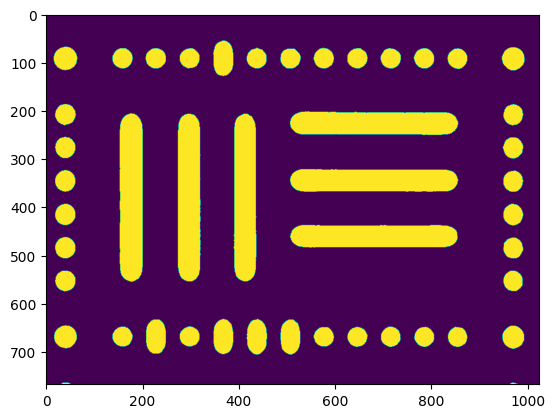

In [15]:
import cv2
import numpy as np

def contour_offset(src, offset):
    return [point + offset for point in src]

def scale_contour(src):
    scale_param = random.uniform(1.1, 1.4)

    rct = cv2.boundingRect(src)

    dc_contour = contour_offset(src, (-rct[0], -rct[1]))

    dc_contour_scale = [point * scale_param for point in dc_contour]

    # test = np.zeros((1024, 768))

    # print(type(dc_contour_scale))
    rct_scale = cv2.boundingRect(np.array(dc_contour_scale, dtype=np.int32))

    offset = ((rct[2] - rct_scale[2]) // 2, (rct[3] - rct_scale[3]) // 2)
    offset = tuple(np.subtract(offset, (-rct[0], -rct[1])))

    return contour_offset(dc_contour_scale, offset)

def scale_contours(src):
    return [scale_contour(contour) for contour in src]


def expand_contour(contour, expansion_amount):
    expanded_contour = []
    for point in contour:
        offset_x = random.randint(-expansion_amount, expansion_amount)
        offset_y = random.randint(-expansion_amount, expansion_amount)
        expanded_point = [point[0][0] + offset_x, point[0][1] + offset_y]
        expanded_contour.append([expanded_point])

    # cv2.drawContours(cont_image, expanded_contour, -1, 128, thickness=cv2.FILLED)
    return np.array([expanded_contour], dtype=np.int32)

# Example of usage
if __name__ == "__main__":
    # src = []  # Add your source contours

    for file_name in filenames_masks:
        bin_mask = cv2.imread(os.path.join(bin_dir, file_name), 0)
        cont, cont_image = detect_contour(bin_mask)
        test = np.zeros_like(bin_mask)
        for c in cont:
            # expansion_amount = random.randint(5, 20)
            # expanded = expand_contour(c, expansion_amount)
            # cv2.drawContours(test, expanded, -1, 128, thickness=cv2.FILLED)
            # intersect = cv2.bitwise_and(cont_image, test)
            # if intersect:
            #     expanded = expand_contour(c, expansion_amount)


            # cv2.drawContours(cont_image, expanded, -1, 128, thickness=cv2.FILLED)

            dst = scale_contours(c)
            dst_np = [np.array(contour, dtype=np.int32) for contour in dst]

            cv2.drawContours(cont_image, dst_np, -1, 128, -1)
        cv2.drawContours(cont_image, cont, -1, 255, -1)

        plt.imshow(cont_image)
        cv2.imwrite(os.path.join(save_dir, file_name), cont_image)



In [ ]:
import cv2
import numpy as np
import random

# Загрузка бинарной маски (предположим, что у вас уже есть бинарная маска)
# binary_mask = cv2.imread('binary_mask.png', cv2.IMREAD_GRAYSCALE)

# # Нахождение контуров на бинарной маске
# contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Создание пустого изображения того же размера, что и бинарная маска
# expanded_contours_mask = np.zeros_like(binary_mask)

# Функция для расширения контуров на рандомное количество пикселей
def expand_contour(contour, expansion_amount):
    # Преобразование контура в многоугольник
    polygon = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    
    # Создание пустого изображения для контура
    contour_mask = np.zeros_like(binary_mask)
    
    # Нарисовать контур на изображении
    cv2.drawContours(contour_mask, [polygon], -1, 255, thickness=cv2.FILLED)
    
    # Расширение контура
    kernel = np.ones((3, 3), np.uint8)
    expanded_contour_mask = cv2.dilate(contour_mask, kernel, iterations=expansion_amount)
    
    return expanded_contour_mask

# Расширение каждого контура на рандомное количество пикселей
for contour in contours:
    # Выбор случайного количества пикселей для расширения
    expansion_amount = random.randint(5, 20)  # Можно изменить диапазон по вашему усмотрению
    
    # Расширение контура
    expanded = expand_contour(contour, expansion_amount)
    
    # Добавление расширенного контура к общему изображению
    expanded_contours_mask = cv2.bitwise_or(expanded_contours_mask, expanded)

# Отображение расширенных контуров
cv2.imshow('Expanded Contours', expanded_contours_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [13]:
random.uniform(1.05, 1.5)

1.2990500985087845

In [33]:
scaled_contour

array([[[185, 767]]], dtype=int32)